In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

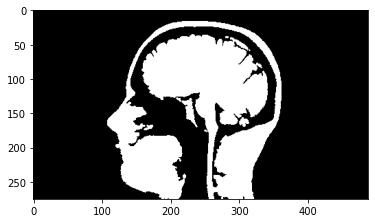

In [5]:
binary_img = cv2.imread('files/binary.png')
plt.imshow(binary_img)
plt.show()

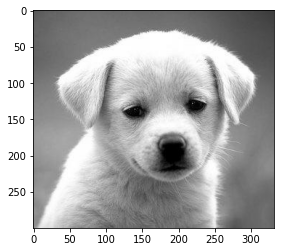

In [6]:
gray_img = cv2.imread('files/grey.jpg')
plt.imshow(gray_img)
plt.show()

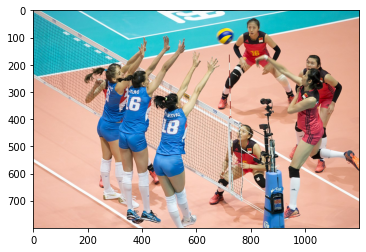

In [19]:
color_img = cv2.imread('files/color.jpg')
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
plt.imshow(color_img)
plt.show()

In [ ]:
# matplotlib ===> RGB
# opencv ===> BGR

In [12]:
binary_cp = binary_img.copy()
binary_cp = cv2.cvtColor(binary_cp, cv2.COLOR_BGR2GRAY)
binary_cp.shape

(275, 488)

In [14]:
grey_cp = gray_img.copy()
grey_cp = cv2.cvtColor(grey_cp, cv2.COLOR_BGR2GRAY)
grey_cp.shape

(300, 332)

In [15]:
color_cp = color_img.copy()
color_cp = cv2.cvtColor(color_cp, cv2.COLOR_BGR2RGB)
color_cp.shape

(800, 1200, 3)

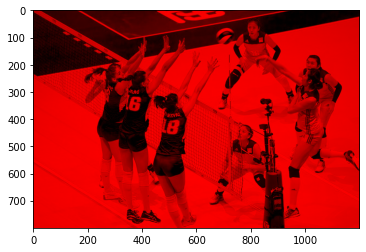

In [20]:
r = color_img.copy()

r[:,:,1] = 0
r[:,:,2] = 0

plt.imshow(r)
plt.show()

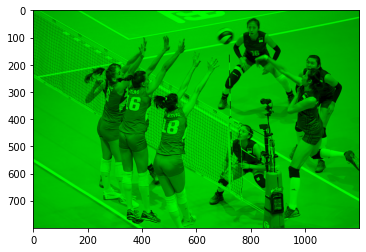

In [21]:
g = color_img.copy()

g[:,:,0] = 0
g[:,:,2] = 0

plt.imshow(g)
plt.show()

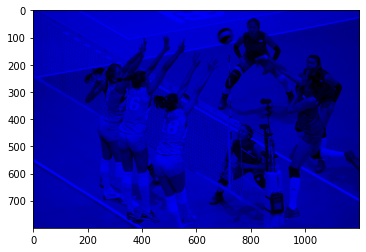

In [22]:
b = color_img.copy()

b[:,:,0] = 0
b[:,:,1] = 0

plt.imshow(b)
plt.show()

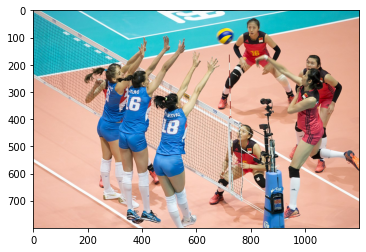

In [23]:
orig = r + g + b
plt.imshow(orig)
plt.show()

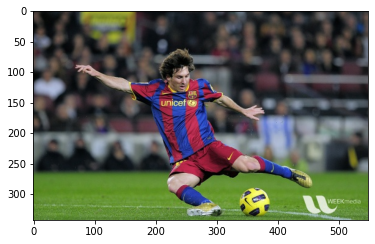

In [27]:
messi = cv2.imread('files/messi.jpg')
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)
plt.imshow(messi)
plt.show()

In [29]:
(r, g, b) = messi[100, 100] # RGB  ( RED: 200, )
print(r, g, b)

200 166 157


In [31]:
px = messi[100, 100]
print(px)
messi[100, 100] = [255, 255, 255]
print(messi[100, 100])

[200 166 157]
[255 255 255]


In [32]:
messi.shape

(342, 548, 3)

In [33]:
messi.size

562248

In [35]:
messi.dtype

dtype('uint8')

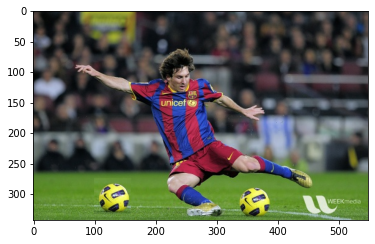

In [38]:
ball = messi[280:340, 330:390] #[y, x]
messi[273:333, 100:160] = ball
plt.imshow(messi)
plt.show()

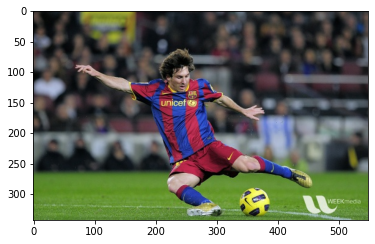

In [36]:
messi = cv2.imread('files/messi.jpg')
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)
plt.imshow(messi)
plt.show()

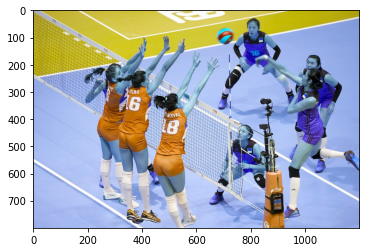

In [43]:
color_bgr = color_img.copy()
color_rgb = cv2.cvtColor(color_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(color_rgb)
plt.show()

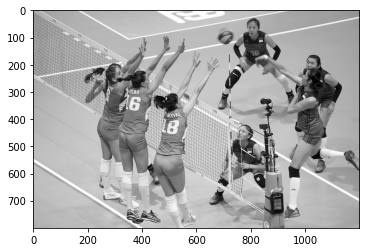

In [45]:
color_rgb = color_img.copy()
color_grey = cv2.cvtColor(color_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(color_grey, cmap='gray')
plt.show()


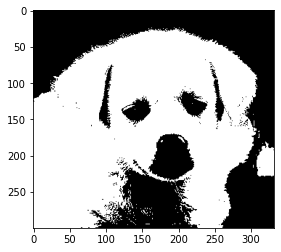

In [46]:
grey_img = cv2.imread('files/grey.jpg', cv2.IMREAD_GRAYSCALE)
(thesh, grey_img) = cv2.threshold(grey_img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(grey_img, cmap='gray')
plt.show()

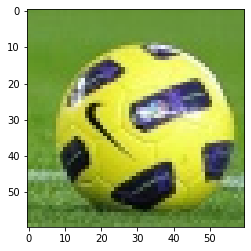

In [48]:
ball = messi[280:340, 330:390]
plt.imshow(ball)
plt.show()

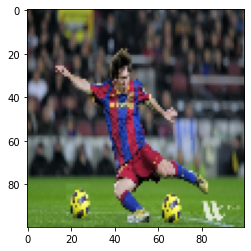

In [49]:
width = 100
height = 100

dim = (width, height)
resized = cv2.resize(messi, dim)

plt.imshow(resized)
plt.show()

# neural network layers ----> Maxpool, Minpool, Avepool

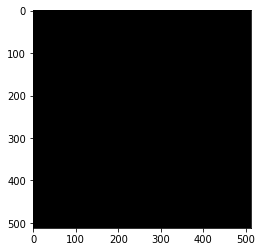

In [51]:
black_back = np.zeros((512, 512, 3), np.uint8)
plt.imshow(black_back)
plt.show()

In [55]:
black_back.shape[1]

512

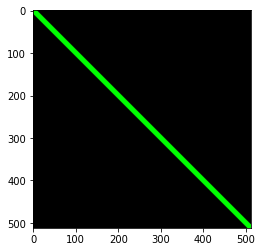

In [57]:
line_back = black_back.copy()
cv2.line(line_back, (0, 0), (line_back.shape[1], line_back.shape[0]),
        (0, 255, 0), 10)

plt.imshow(line_back)
plt.show()

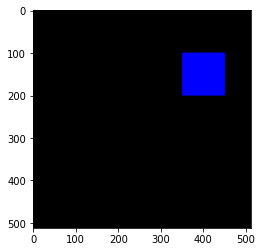

In [59]:
rec_back = black_back.copy()
cv2.rectangle(rec_back, (350, 100), (450, 200), (0, 0, 255), cv2.FILLED) 
plt.imshow(rec_back)
plt.show()

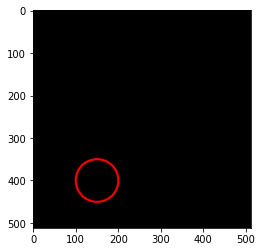

In [60]:
circle_back = black_back.copy()
cv2.circle(circle_back,(150, 400), 50, (255, 0, 0), 3 )
plt.imshow(circle_back)
plt.show()

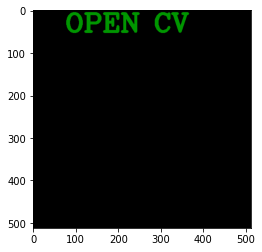

In [63]:
txt_back = black_back.copy()
cv2.putText(txt_back, 'OPEN CV', (75, 50), cv2.FONT_HERSHEY_COMPLEX,
           2, (0, 150, 0), 5)
plt.imshow(txt_back)
plt.show()

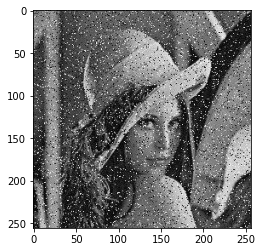

In [65]:
grey_noisy = cv2.imread('files/lena_noisy.jpg')
plt.imshow(grey_noisy, cmap='gray')
plt.show()

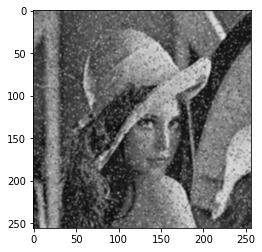

In [70]:
#gaussian
grey_gsn = grey_noisy.copy()
grey_denoised = cv2.GaussianBlur(grey_gsn, (3, 3), 1)
plt.imshow(grey_denoised, cmap='gray')
plt.show()

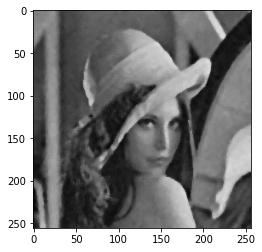

In [71]:
grey_mdn = grey_noisy.copy()

median_blur = cv2.medianBlur(grey_mdn, 5)
plt.imshow(median_blur, cmap='gray')
plt.show()

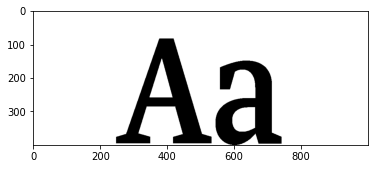

In [72]:
#dilation
#erosion

Aa = cv2.imread('files/text.png')
plt.imshow(Aa, cmap='gray')
plt.show()




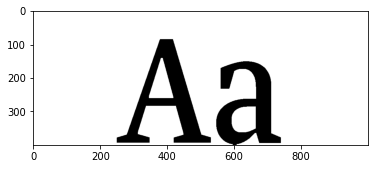

In [73]:
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(Aa, kernel, iterations= 1)
plt.imshow(img_dilation, cmap='gray')
plt.show()

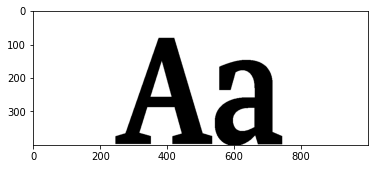

In [74]:
img_erosion = cv2.erode(Aa, kernel, iterations=1)
plt.imshow(img_erosion, cmap='gray')
plt.show()

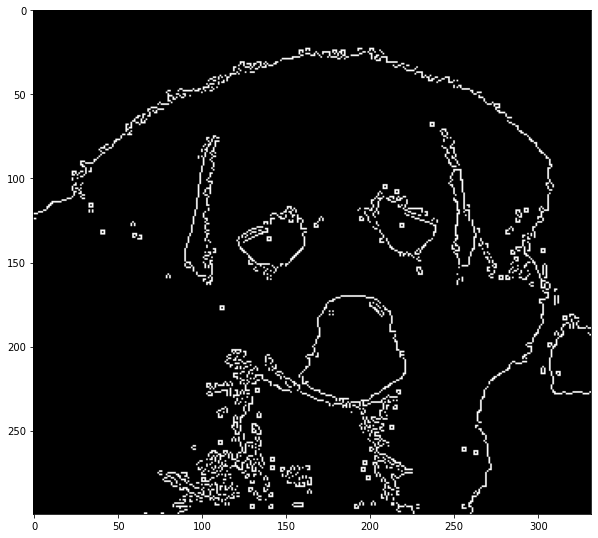

In [78]:
img_edgdtc = grey_img.copy()

edges = cv2.Canny(img_edgdtc, 100, 200)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.show()

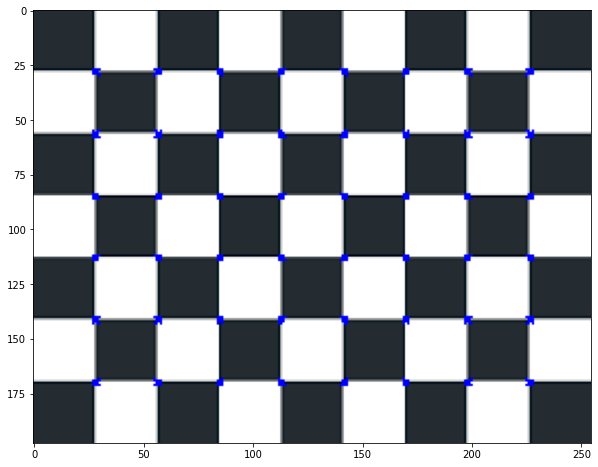

In [85]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

img = cv2.imread('files/chess.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



res = cv2.cornerHarris(gray, 2, 3, 0.04)
#res = cv2.dilate(res, None)
img[res > 0.01*res.max()] = [0, 0, 255]
plt.figure(figsize=(10, 10))

plt.imshow(img)
plt.show()

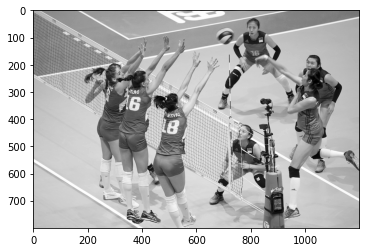

In [87]:
img_color = cv2.imread('files/color.jpg', 0)
plt.imshow(img_color, cmap='gray')
plt.show()

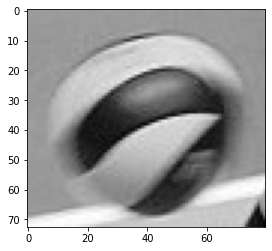

In [90]:
template  = cv2.imread('files/template.jpg', 0)
plt.imshow(template, cmap='gray')
plt.show()

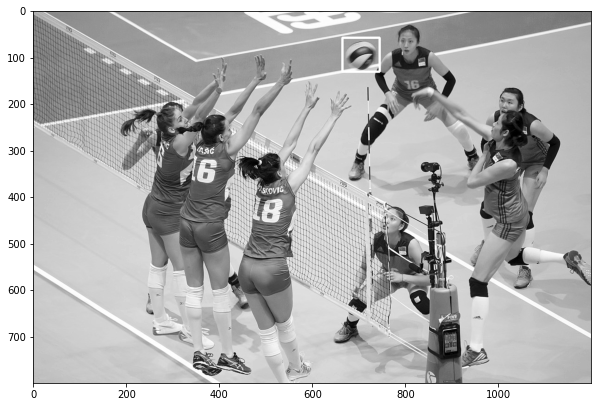

In [93]:
img_gray = cv2.imread('files/color.jpg', 0)
template = cv2.imread('files/template.jpg', 0)

h, w = template.shape
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0]+w, top_left[1]+h)


cv2.rectangle(img_gray, top_left, bottom_right, 255, 3 )
plt.figure(figsize=(10, 10))

plt.imshow(img_gray, cmap='gray')
plt.show()






